Define variables and import required function.

In [28]:
from math import log
from tqdm import tqdm
import statistics

#Define the call outcomes for t<25 and t>25
CALL_OUTCOMES = {("LINE BUSY", 0.2, 0.2, 6+3+1), ("UNAVAILABLE", 0.3, 0.5, 6+25+1), ("AVAILABLE", 0.5, 1.0, 6+1)}
PRECISION = 5

Create a random number generator using linear congruential random number algorithm.

In [45]:
def random_number_gen(x0=1000, a=24693, c=3517, k=(2**17)):
    while True:
        x_i = (a * x0 + c) % k
        yield (x_i/k)
        x0 = x_i

Generate the 51st, 52nd, and 53rd random numbers.

In [46]:
random_num_gen = random_number_gen()

for i in range (1, 54):
    num = next(random_num_gen)
    if (i in range(51, 54)):
        print(f"Num {i} : {num}")


TypeError: 'function' object is not an iterator

Create random variable generators for both the call outcome $C$ and total call time $X$ to simulate call.

In [26]:
def determine_call_time(random_num): #previous cont_rand_var_gen
    return -12*log(1-random_num)

def simulate_call(random_num):
    # determine call outcome by iterating through all outcomes and finding the first match to CDF
    for outcome in CALL_OUTCOMES:
        if outcome[2] >= random_num:
            call_outcome = outcome
            if call_outcome[0] == "AVAILABLE":
                time_waited = determine_call_time((random_num - 0.5) / 0.5)
                if time_waited <= 25:
                    return ("AVAILABLE", 0.5, 1.0, round(6 + time_waited, PRECISION))
                else:
                    return ("UNAVAILABLE", 0.5, 1.0, 32)
            else:
                return ("UNAVAILABLE", 0.5, 1.0, 32)

Run the simulation.

In [39]:
total_customers_called = 0
total_time_spent = 0
call_time_t = []
total_time_w = []
number_of_successful_customers = 0
generator = random_number_gen()

number_of_calls_on_customer = 0
current_time = 0

for call_index in tqdm(range(1000)):
    rand_num = next(generator)
    call_outcome, _, _, time_spent_t = simulate_call(rand_num)
    number_of_calls_on_customer += 1 
    call_time_t.append(time_spent_t)
    current_time += time_spent_t

    if call_outcome == "AVAILABLE":
        total_time_w.append(current_time)
        current_time = 0
        number_of_calls_on_customer = 0
        number_of_successful_customers += 1

    elif number_of_calls_on_customer == 4:
            total_time_w.append(current_time)
            current_time = 0
            number_of_calls_on_customer = 0     

100%|██████████| 1000/1000 [00:00<00:00, 856155.13it/s]


Some statisics.

In [30]:
print (f"Number of successful customers : {number_of_successful_customers}")
print (f"Average time per customer : {round(sum(total_time_w)/len(total_time_w), PRECISION)} seconds")
print (f"Number of customers : {len(total_time_w)}")
print (f"Average call time : {round(sum(call_time_t)/len(call_time_t), PRECISION)} seconds")
print (f"Average number of calls per customer : {round(len(call_time_t)/len(total_time_w), PRECISION)}")

Number of successful customers : 429
Average time per customer : 50.70721 seconds
Number of customers : 480
Average call time : 24.37146 seconds
Average number of calls per customer : 2.08333


In [34]:
import statistics

mean = statistics.mean(total_time_w)
median = statistics.median(total_time_w)

# Calculate quartiles
first_quartile = statistics.quantiles(total_time_w, n=4)[0]
third_quartile = statistics.quantiles(total_time_w, n=4)[-1]

prob_w_leq_15 = len([time for time in total_time_w if time <= 15])/len(total_time_w)

prob_w_leq_20 = len([time for time in total_time_w if time <= 20])/len(total_time_w)

prob_w_leq_30 = len([time for time in total_time_w if time <= 30])/len(total_time_w)

prob_w_g_40 = len([time for time in total_time_w if time > 40])/len(total_time_w)

prob_w_g_60 = len([time for time in total_time_w if time > 60])/len(total_time_w)

prob_w_g_80 = len([time for time in total_time_w if time > 80])/len(total_time_w)

prob_w_g_100 = len([time for time in total_time_w if time > 100])/len(total_time_w)

print(f"Average time per customer : {mean}")
print(f"Median : {median}")
print(f"First Quartile : {first_quartile}")
print(f"Third Quartile : {third_quartile}")
print(f"W <= 15 : {prob_w_leq_15}")
print(f"W <= 20 : {prob_w_leq_20}")
print(f"W <= 30 : {prob_w_leq_30}")
print(f"W > 40 : {prob_w_g_40}")
print(f"W > 60 : {prob_w_g_60}")
print(f"W > 80 : {prob_w_g_80}")
print(f"W > 100 : {prob_w_g_100}")
print(f"Max time: {max(total_time_w)}")
print(f"Min time: {min(total_time_w)}")

Average time per customer : 50.707211979166665
Median : 43.198135
First Quartile : 14.8374075
Third Quartile : 76.38365999999999
W <= 15 : 0.2520833333333333
W <= 20 : 0.3458333333333333
W <= 30 : 0.4
W > 40 : 0.5541666666666667
W > 60 : 0.3333333333333333
W > 80 : 0.22708333333333333
W > 100 : 0.1625
Max time: 128
Min time: 6.11758


In [ ]:
import matplotlib.pyplot as plt


# Sample space
sample_space = [0, 15, 20, 30, 40, 60, 80, 100]

# Cumulative probabilities
cumulative_probs = [
    0,
    prob_w_leq_15,
    prob_w_leq_20,
    prob_w_leq_30,
    1 - prob_w_g_40,
    1 - prob_w_g_60,
    1 - prob_w_g_80,
    1 - prob_w_g_100
]

# Plot CDF
plt.step(sample_space, cumulative_probs, where='post')
plt.xlabel('W (seconds)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of W')
plt.grid(True)
plt.show()


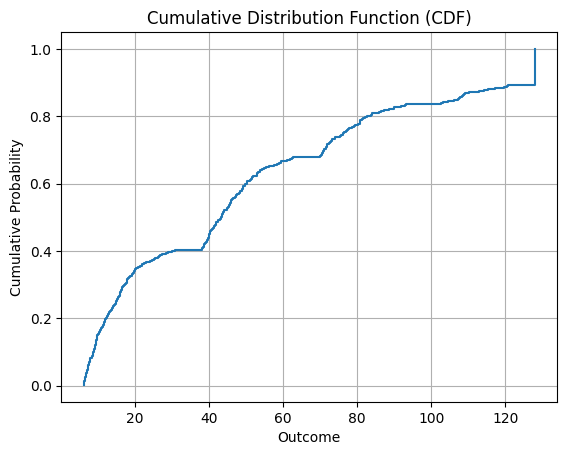

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Array of outcomes
outcomes = np.array(total_time_w)

# Sort the outcomes
sorted_outcomes = np.sort(outcomes)

# Calculate the cumulative probabilities
cumulative_probs = np.arange(1, len(sorted_outcomes) + 1) / len(sorted_outcomes)

# Plot CDF
plt.step(sorted_outcomes, cumulative_probs, where='post')
plt.xlabel('Outcome')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()